In [196]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt 

In [197]:
def jsonreader(path):
    data = []
    with open(path, 'r') as file:
        for line in file:
            data.append(json.loads(line))

    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Display the DataFrame
    return (df)

In [198]:
dftest=jsonreader(r"C:\Users\tanis\Desktop\Palindrome Checker\assignment2\test.jsonl")
dftrain=jsonreader(r"C:\Users\tanis\Desktop\Palindrome Checker\assignment2\train.jsonl")

In [283]:
df=dftrain
df

,tokens,chunk_tags,pos_tags,pos_tags_hot_encoded
0,"[EU, rejects, German, call, to, boycott, Briti...","[1, 1, 1, 0, 1, 1, 1, 0, 1]","[1, 4, 3, 1, 4, 4, 3, 1, 4]","[[1, 1, 1, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0,..."
1,"[Peter, Blackburn]","[1, 0]","[1, 1]","[[1, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 0]]"
2,"[BRUSSELS, 1996-08-22]","[1, 0]","[1, 4]","[[1, 1, 1, 1], [1, 0, 0, 0], [0, 0, 0, 1]]"
3,"[The, European, Commission, said, on, Thursday...","[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[2, 1, 1, 4, 4, 1, 4, 4, 4, 3, 1, 4, 1, 4, 4, ...","[[1, 1, 1, 1], [0, 1, 0, 0], [1, 0, 0, 0], [1,..."
4,"[Germany, 's, representative, to, the, Europea...","[1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, ...","[1, 4, 1, 4, 2, 1, 1, 4, 3, 1, 1, 1, 4, 4, 1, ...","[[1, 1, 1, 1], [1, 0, 0, 0], [0, 0, 0, 1], [1,..."
...,...,...,...,...
14036,"[on, Friday, :]","[1, 1, 1]","[4, 1, 4]","[[1, 1, 1, 1], [0, 0, 0, 1], [1, 0, 0, 0], [0,..."
14037,"[Division, two]","[1, 0]","[1, 4]","[[1, 1, 1, 1], [1, 0, 0, 0], [0, 0, 0, 1]]"
14038,"[Plymouth, 2, Preston, 1]","[1, 0, 0, 0]","[1, 4, 1, 4]","[[1, 1, 1, 1], [1, 0, 0, 0], [0, 0, 0, 1], [1,..."
14039,"[Division, three]","[1, 0]","[1, 4]","[[1, 1, 1, 1], [1, 0, 0, 0], [0, 0, 0, 1]]"


In [291]:
print(df['chunk_tags'][5000])
print(df['pos_tags'][5000])
print(df['tokens'][0])
[1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]

[1, 1, 1, 0, 0, 1, 1]
[1, 4, 4, 4, 4, 4, 4]
['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.']


[1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]

In [255]:
def preprocess(df):
    replacement_map = {
        1: [1, 0, 0, 0],
        2: [0, 1, 0, 0],
        3: [0, 0, 1, 0],
        4: [0, 0, 0, 1]
        # Add more mappings as needed
    }
    k=[[replacement_map.get(x, [0, 0, 0, 0]) for x in sublist] for sublist in df['pos_tags']]
    insert_list = [1, 1,1,1]
    updated_list = [[insert_list]+sublist for sublist in k]  
    df['pos_tags_hot_encoded']=updated_list
    X=np.array(df['pos_tags_hot_encoded'])
    X=X.reshape(X.shape[0],1)
    return X

In [256]:
X=preprocess(df)

k=np.array(df['chunk_tags'])
Y=k.reshape(k.shape[0],1)

In [257]:
def new_x(X):
    k={}
    k["pos_tags"]=[X]
    df = pd.DataFrame(k)
    return df
    

In [ ]:
import spacy

def convert_to_pos_tags(sentence):
    # Load the English language model in spaCy
    nlp = spacy.load("en_core_web_sm")
    
    # Process the input sentence using spaCy
    doc = nlp(sentence)
    
    # Map POS tags to the given numeric values
    converted_tags = []
    for token in doc:
        if token.tag_.startswith('NN'):  # If the tag starts with 'NN', it's a noun
            converted_tags.append(1)
        elif token.tag_.startswith('DT'):  # If the tag starts with 'DT', it's a determiner
            converted_tags.append(2)
        elif token.tag_.startswith('JJ'):  # If the tag starts with 'JJ', it's an adjective
            converted_tags.append(3)
        else:
            converted_tags.append(4)  # Assign 4 for other POS tags
    
    return converted_tags

# Example usage
sentence = "Boys play joyfully with brown balls in the green big field"
pos_tags = convert_to_pos_tags(sentence)
print(pos_tags)



In [203]:
def sigmoid(X):
     return 1/(1+np.exp(-X))
def sigmoid_derivative(x):
        return np.multiply(x,(1-x))

In [204]:
def perceptron(a_prev,x,Wax,Wya,b):
    a_curr=sigmoid(np.dot(x.T,Wax)+np.dot(a_prev,Wya)+b)
    return a_curr[0][0]

In [205]:
import random
def intialize(seed_value=None):
    random.seed(seed_value)
    Wax=np.random.rand(8,1)
    Wya=np.random.rand(1,1)
    b=np.random.rand(1,1)
    return Wax,Wya,b

In [206]:
def forward(X,Wax,Wya,b):
    output=np.zeros((1,X.shape[0]-1))
    out=0
    for i in range(X.shape[0]-1):
        k=X[i:i+2].reshape(8,1)
        out=perceptron(out,k,Wax,Wya,b)
        output[0,i]=out  
    output=output[0]
    return output,Wax,Wya,b 

In [207]:
def loss(output,Y):
    x=np.dot(-Y,np.log(output).T)-np.dot((1-Y),np.log(1-output).T)
    return x/output.shape[0]

In [208]:

Wax,Wya,b=intialize(0)


In [209]:
def rnn(X,Wax,Wya,b):
    output=[]
    for i in range(len(X)):
        k=np.array(X[i][0])
        out,Wax,Wya,b=forward(k,Wax,Wya,b)
        output.append(out)
        
    return  output,Wax,Wya,b   
        
        

In [210]:
output,Wax,Wya,b=rnn(X,Wax,Wya,b)

In [211]:
output[0]

array([0.89345232, 0.89954687, 0.85825063, 0.90097669, 0.89983721,
       0.89430673, 0.85797783, 0.90096628, 0.89983681])

In [212]:
def Cost(output,Y):
    los=0
    for i in range(len(Y)):
        los=los+loss(output[i],np.array(Y[i][0]))
    return los/len(Y)    
        
    

In [213]:
Cost(output,Y)

0.8872609191102911

In [214]:
def backpropagation(output,X,Y,Wax,Wya,b):
    dl_dwya=0
    dl_dwax=0
    dl_db=0
    for i in range(len(output)):
        x=np.array(X[i][0])
        o=output[i]
        y_true=Y[i][0]
        for j in range(len(o)):
            k=x[j:j+2].reshape(8,1)
            z=o[j]-y_true[j]
            dl_db=dl_db+z
            dl_dwax=dl_dwax+k*z
            l=j-1
            statemul=o[j]*(1-o[j])
            while l>0:
                statemul=statemul*o[l]*(1-o[l])
                l=l-1
            dl_dwya=dl_dwya+z*statemul       
    return  dl_dwya/len(output),dl_dwax/len(output),dl_db/len(output)      
                


In [215]:
def update(alpha,dl_dwya,dl_dwax,dl_db,Wya,Wax,b):
    Wya=Wya-alpha*dl_dwya
    Wax=Wax-alpha*dl_dwax
    b=b-alpha*dl_db
    return Wya,Wax,b

In [216]:
def train(X,Y,epoch,alpha,Wax,Wya,b):
    error=[]
    for i in range(epoch):
        out,Wax,Wya,b=rnn(X,Wax,Wya,b)
        error.append(Cost(out,Y))
        print(Cost(out,Y))
        dl_dwya,dl_dwax,dl_db=backpropagation(out,X,Y,Wax,Wya,b)
        Wya,Wax,b=update(alpha,dl_dwya,dl_dwax,dl_db,Wya,Wax,b)
    return error,Wya,Wax,b

In [251]:
def prediction(X,Wax,Wya,b):
    ans=[]
    out,Wax,Wya,b=rnn(X,Wax,Wya,b)
    for i in range(len(out)):
        an=[]
        yhat=(out[i])
        for j in yhat:
            if j>=0.5:
                an.append(1)
            else:
                an.append(0)
        ans.append(an)   
    return ans    


In [249]:
ans=prediction(X,Wax,Wya,b)


In [240]:
def accuracy(ans,Y):
    j=0
    for i in range(len(Y)):
        if ans[i]==Y[i][0]:
            j+=1
    return (j/len(Y) )*100 

In [250]:
accuracy(ans,Y)

29.105125977410946

In [221]:
class RNN:
    def __init__(self,epoch,alpha):
         self.epoch=epoch
         self.alpha=alpha
    def sigmoid(self,X):
        return 1/(1+np.exp(-X))
    def perceptron(self,a_prev,x,Wax,Wya,b):
        a_curr=sigmoid(np.dot(x.T,Wax)+np.dot(a_prev,Wya)+b)
        return a_curr[0][0]
    def intialize(self,seed_value=None):
        random.seed(seed_value)
        Wax=np.random.standard_normal(8,1)
        Wya=np.random.standard_normal(1,1)
        b=np.random.standard_normal(1,1)
        return Wax,Wya,b
    def forward(self,X,Wax,Wya,b):
        output=np.zeros((1,X.shape[0]-1))
        out=0
        for i in range(X.shape[0]-1):
            k=X[i:i+2].reshape(8,1)
            out=self.perceptron(out,k,Wax,Wya,b)
            output[0,i]=out  
        output=output[0]
        return output,Wax,Wya,b  
    def loss(self,output,Y):
        x=np.dot(-Y,np.log(output).T)-np.dot((1-Y),np.log(1-output).T)
        return x/output.shape[0]
    def rnn(self,X,Wax,Wya,b):
        output=[]
        for i in range(len(X)):
            k=np.array(X[i][0])
            out,Wax,Wya,b=self.forward(k,Wax,Wya,b)
            output.append(out)

        return  output,Wax,Wya,b  
    def Cost(self,output,Y):
        los=0
        for i in range(len(Y)):
            los=los+self.loss(output[i],np.array(Y[i][0]))
        return los/len(Y)    

    def backpropagation(self,output,X,Y,Wax,Wya,b):
        dl_dwya=0
        dl_dwax=0
        dl_db=0
        for i in range(len(output)):
            x=np.array(X[i][0])
            o=output[i]
            y_true=Y[i][0]
            for j in range(len(o)):
                k=x[j:j+2].reshape(8,1)
                z=o[j]-y_true[j]
                dl_db=dl_db+z
                dl_dwax=dl_dwax+k*z
                l=j-1
                statemul=o[j]*(1-o[j])
                while l>0:
                    statemul=statemul*o[l]*(1-o[l])
                    l=l-1
                dl_dwya=dl_dwya+z*statemul       
        return  dl_dwya/len(output),dl_dwax/len(output),dl_db/len(output) 
        def Cost(self,output,Y):
            los=0
            for i in range(len(Y)):
                los=los+self.loss(output[i][0],np.array(Y[i][0]))
            return los/len(Y)   
    def update(self,alpha,dl_dwya,dl_dwax,dl_db,Wya,Wax,b):
        Wya=Wya-alpha*dl_dwya
        Wax=Wax-alpha*dl_dwax
        b=b-alpha*dl_db
        return Wya,Wax,b 
    def train(self,X,Y,epoch,alpha,Wax,Wya,b):
        error=[]
        accu=[]
        for i in range(epoch):
            out,Wax,Wya,b=self.rnn(X,Wax,Wya,b)
            error.append(self.Cost(out,Y))
            accu.append(self.accuracy_token(self.prediction(X,Wax,Wya,b),Y))
            print(Cost(out,Y))
            dl_dwya,dl_dwax,dl_db=self.backpropagation(out,X,Y,Wax,Wya,b)
            Wya,Wax,b=self.update(alpha,dl_dwya,dl_dwax,dl_db,Wya,Wax,b)
        return error,accu,Wya,Wax,b
    def prediction(self,X,Wax,Wya,b):
        ans=[]
        out,Wax,Wya,b=self.rnn(X,Wax,Wya,b)
        for i in range(len(out)):
            an=[]
            yhat=(out[i])
            for j in yhat:
                if j>=.5:
                    an.append(1)
                else:
                    an.append(0)
            ans.append(an)   
        return ans  
    def accuracy_token(self,ans,Y):
        total=0
        for i in range(len(Y)):
            k=0
            for j in range(len(ans[i])):
                if ans[i][j]==Y[i][0][j]:
                    k+=1
                k=k/len(ans[i])  
                total=total+k
                
        return (total/len(Y) )*100
    def accuracy_seq(self,ans,Y):
        j=0
        for i in range(len(Y)):
            if ans[i]==Y[i][0]:
                j+=1
        return (j/len(Y) )*100 
    def rnnforward(self,X,Y):
        Wax,Wya,b=intialize(4)
        error,accu,Wya,Wax,b=self.train(X,Y,self.epoch,self.alpha,Wax,Wya,b)
        k=np.arange(1,self.epoch+1)

        plt.plot(k,error)
    # plt.set_title("Error")
        plt.show()
        return error,accu,Wya,Wax,b
        
        

    
        
    

In [222]:
rnnn=RNN(150,0.1)
print(Wya)

[[0.42757807]]


0.7091012762817656
0.6580446965105009
0.6348327878766671
0.6224765667833173
0.6146794112733089
0.6091991047004172
0.6050764552377659
0.6018159656361478
0.5991272122634008
0.596826942474369
0.5947946717197611
0.5929493925546979
0.5912360187129132
0.5896169327763078
0.5880664778518334
0.5865672636403503
0.5851076414612172
0.5836799553827013
0.5822793196210866
0.5809027583671321
0.5795485981750932
0.5782160379931117
0.5769048450539741
0.5756151404465099
0.5743472488546132
0.5731015943325356
0.571878629146453
0.5706787863536463
0.5695024493793646
0.5683499337059541
0.5672214771249319
0.5661172359700518
0.5650372854541252
0.5639816227468046
0.5629501718072485
0.561942789262621
0.5609592708266627
0.5599993579022022
0.5590627441211753
0.5581490816566853
0.5572579871996703
0.5563890475361354
0.5555418246910381
0.5547158606268157
0.5539106815000086
0.5531258014894269
0.5523607262164867
0.5516149557819892
0.5508879874464501
0.5501793179816777
0.5494884457212271
0.5488148723367723
0.5481581043665

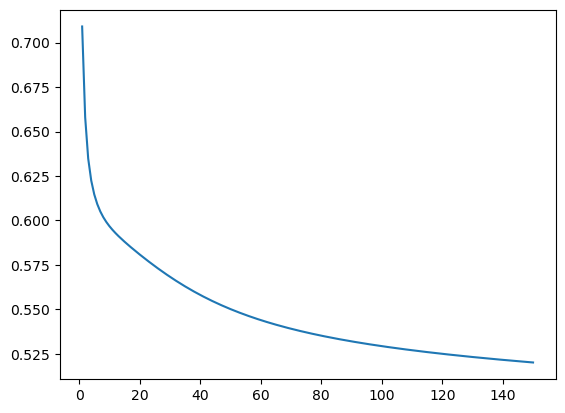

In [223]:
error,accu,Wya,Wax,b=rnnn.rnnforward(X,Y)

In [260]:
error,Wya,Wax,b=train(X,Y,100,0.1,Wax,Wya,b)


0.520004987305952
0.5198660683420182
0.5197282690870568
0.5195915687019989
0.5194559469115513
0.5193213839860987
0.5191878607241912
0.5190553584357802
0.5189238589260743
0.5187933444797386
0.5186637978459473
0.5185352022237629
0.5184075412480972
0.5182807989762175
0.5181549598745642
0.5180300088062599
0.517905931018841
0.5177827121325411
0.5176603381288439
0.5175387953397137
0.5174180704367953
0.5172981504213061
0.5171790226141076
0.5170606746462404
0.5169430944495976
0.5168262702480653
0.5167101905489336
0.5165948441345488
0.5164802200542472
0.5163663076166077
0.5162530963819213
0.5161405761549259
0.5160287369777218
0.5159175691230501
0.5158070630876626
0.5156972095859804
0.5155879995438458
0.5154794240927025
0.5153714745637326
0.5152641424822132
0.5151574195623031
0.5150512977016293
0.514945768976275
0.5148408256358883
0.5147364600989407
0.5146326649480174
0.5145294329254936
0.514426756929194
0.5143246300080805
0.5142230453583564
0.5141219963194132
0.5140214763700564
0.51392147912485

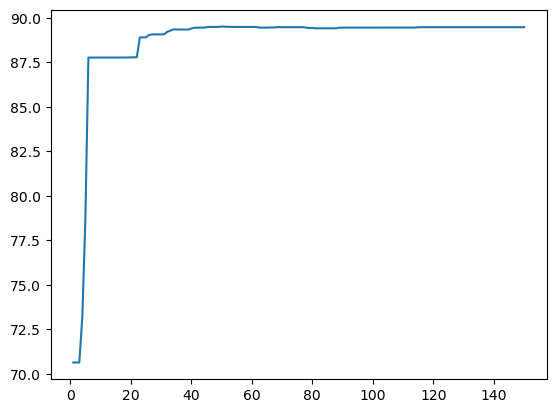

In [224]:
# error,Wya,Wax,b=train(X,Y,100,0.1,Wax,Wya,b)
k=np.arange(1,150+1)
plt.plot(k,accu)

# Best Weights

In [261]:
print(Wax)
print(Wya)
print(b)

[[ 2.25685663]
 [ 0.03192519]
 [ 0.96986717]
 [ 3.32325623]
 [-1.70253729]
 [ 1.66425283]
 [-0.97015153]
 [ 0.77813112]]
[[0.25050293]]
[[-1.79040026]]


In [265]:
Wax=np.array([[ 1.5234745 ],
 [-0.03025682],
 [ 0.53068704],
 [ 2.52354128],
 [-1.41983243],
 [ 1.33864204],
 [-0.6169723 ],
 [ 0.99901114]])
Wya=np.array([[0.38309115]])
b=np.array([[-1.34831732]])

In [266]:
ans=prediction(X,Wax,Wya,b)
print(rnnn.accuracy_token(ans,Y))
print(rnnn.accuracy_seq(ans,Y))

89.34503541481091
31.415141371697175


# Prediction

In [311]:
sentence="The blue eyes"
x=convert_to_pos_tags(sentence)
# x=[1, 4, 4, 4, 4, 4, 4]
x=new_x(x)
x=preprocess(x)
k=prediction(x,Wax,Wya,b)
print(k[0])


[1, 0, 0]


# 5 Fold Validation

In [268]:
df=dftest
X=preprocess(df)
k=np.array(df['chunk_tags'])
Y=k.reshape(k.shape[0],1)
ans=rnnn.prediction(X,Wax,Wya,b)
print(rnnn.accuracy_token(ans,Y))
print(rnnn.accuracy_seq(ans,Y))

86.17407120243395
29.105125977410946


In [ ]:
from sklearn.model_selection import KFold

# Assuming X_train and y_train are your training data and labels
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Initialize 5-fold cross-validation

for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]  # Split data into train and validation sets
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]  # Split labels into train and validation sets



# Metrices

In [269]:
import numpy as np
from nltk.metrics.distance import edit_distance

Y_true = [sublist[0] for sublist in Y]
Y_true

def precision_score(y_true, y_pred):
    true_positives = 0
    false_positives = 0
    for true_seq, pred_seq in zip(y_true, y_pred):
        # Calculate Levenshtein distance between true and predicted sequences
        distance = edit_distance(true_seq, pred_seq)
        # Define a threshold for similarity (e.g., 90% similarity)
        similarity_threshold = 0.9
        if distance / max(len(true_seq), len(pred_seq)) <= similarity_threshold:
            true_positives += 1
        else:
            false_positives += 1
    precision = true_positives / (true_positives + false_positives)
    return precision

# Example usage

precision = precision_score(Y_true, ans)
print("Precision:", precision)

Precision: 1.0


In [270]:

def f1_score(y_true, y_pred):
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    for true_seq, pred_seq in zip(y_true, y_pred):
        true_seq = ''.join(map(str, true_seq))  # Convert true sequence to string
        pred_seq = ''.join(map(str, pred_seq))  # Convert predicted sequence to string
        distance = edit_distance(true_seq, pred_seq)
        if distance == 0:  # Exact match
            true_positives += 1
        else:
            false_positives += 1
            false_negatives += 1
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1
f1score = f1_score(Y_true, ans)
print("f1score:", f1score)

f1score: 0.29105125977410945


In [271]:
def recall_score_sequence(y_true, y_pred):
    true_positives = 0
    false_negatives = 0
    for true_seq, pred_seq in zip(y_true, y_pred):
        true_seq = ''.join(map(str, true_seq))  # Convert true sequence to string
        pred_seq = ''.join(map(str, pred_seq))  # Convert predicted sequence to string
        distance = edit_distance(true_seq, pred_seq)
        if distance == 0:  # Exact match
            true_positives += 1
        else:
            false_negatives += 1
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    return recall
recall_score_sequence(Y_true, ans)

0.29105125977410945

[1, 4, 4, 4, 3, 1, 4, 2, 3, 3, 1]
